<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Candidate/TIC_407210683_1_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
# lc_0.csv is made for slected sectors or specifically made for this one
data = pd.read_csv("lc_2.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.006)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 407210683
period = 28.4771000523856  # Orbital period in days
epoch = 1814.15913591852
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.5]
folded_lc = folded_lc[folded_lc.time > -0.5]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_407210683_all_sector_lightcurve.csv


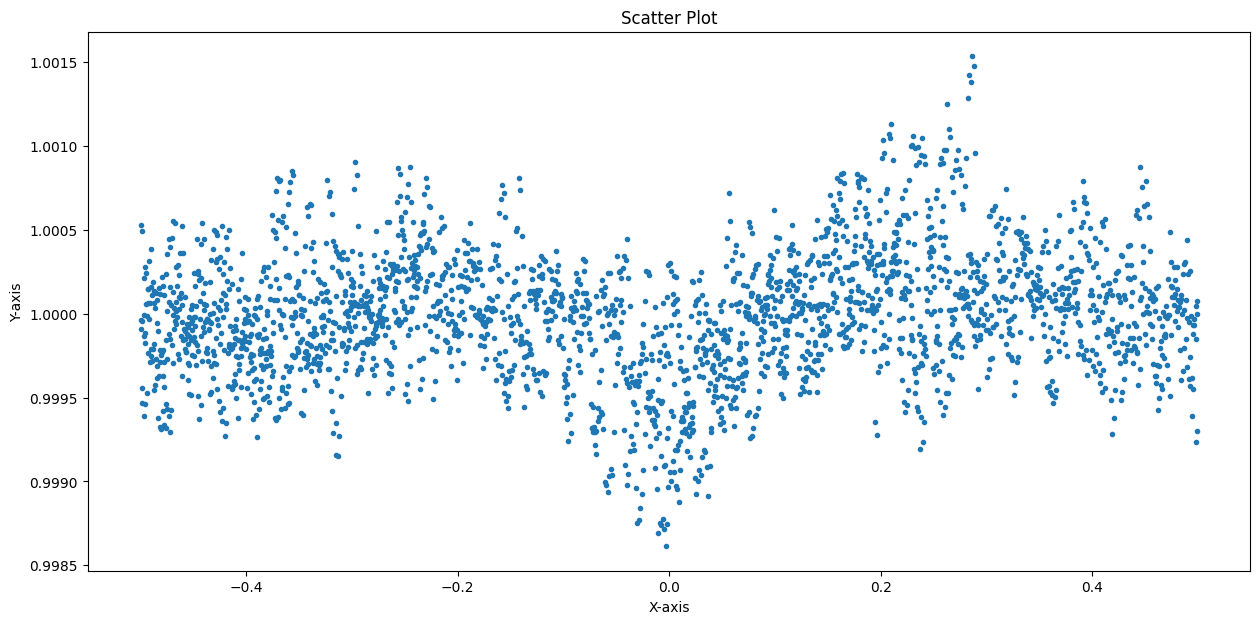

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([18, 24, 52, 58])
target = tr.target(ID=ID, sectors=sectors, search_radius=7) # target radius shorted

<ipython-input-7-9d02defebf6f>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_18, ap_24, ap_52, ap_58])


Sector 18


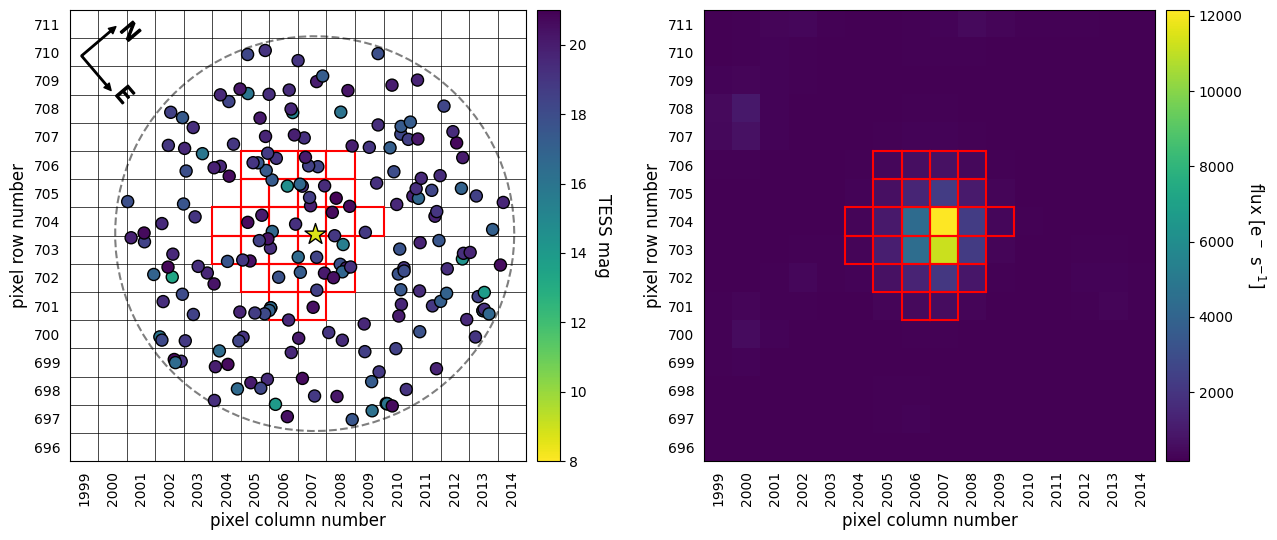

Sector 24


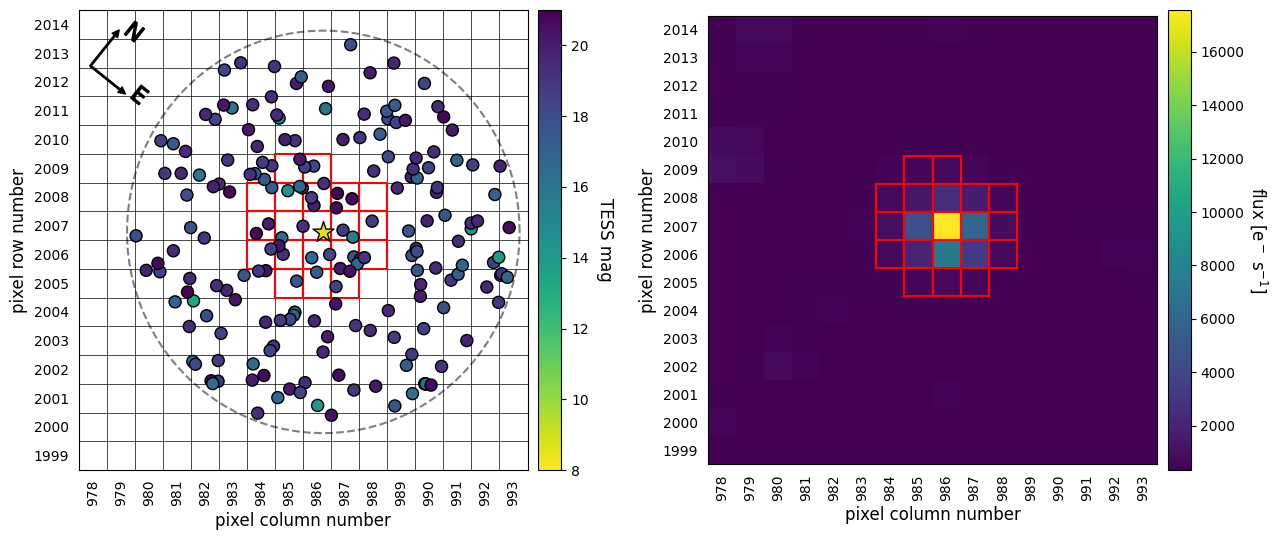

Sector 52


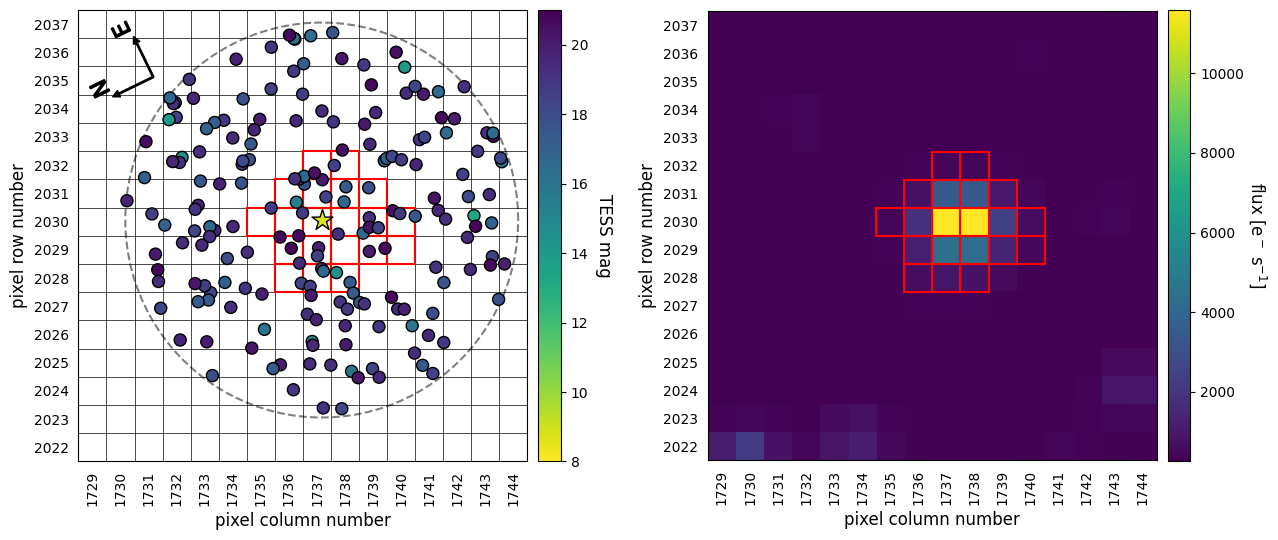

Sector 58


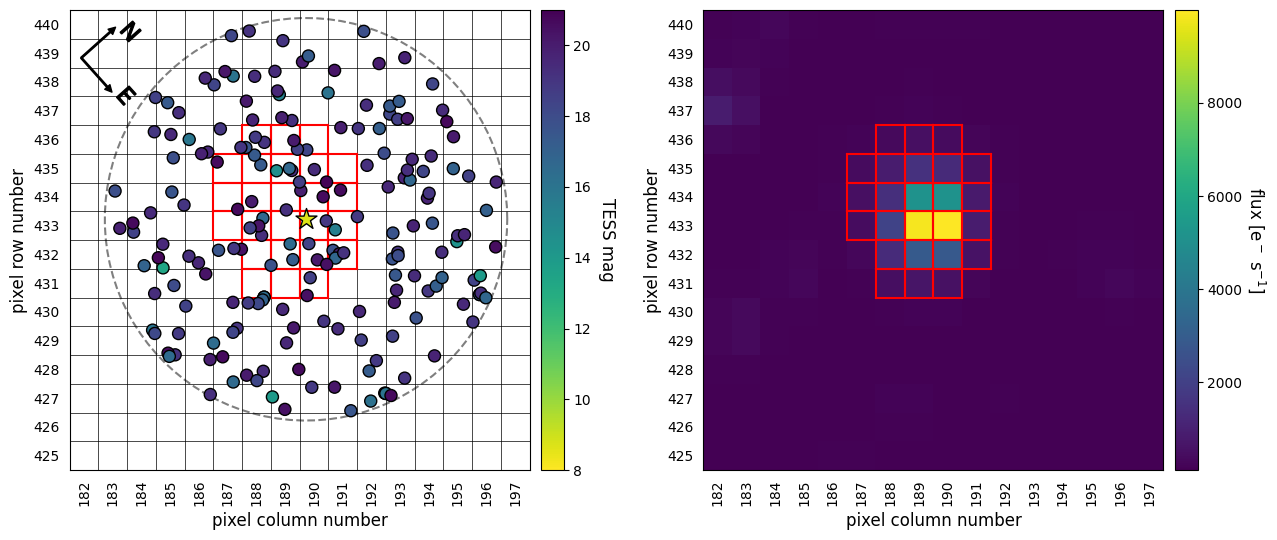

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,407210683,8.67229,7.411,6.742,6.568,6.719592,70.142422,0.51694,0.519444,3709.0,61.844400,0.000,0.000
1,608504529,18.87670,NaN,NaN,NaN,6.728291,70.145227,NaN,NaN,NaN,0.309870,14.669,46.476
2,608504540,19.22220,NaN,NaN,NaN,6.707874,70.140708,NaN,NaN,NaN,0.236767,15.602,246.707
3,397763004,18.39530,16.371,15.294,14.914,6.731031,70.139643,NaN,NaN,NaN,NaN,17.199,125.564
4,608504534,20.62640,NaN,NaN,NaN,6.716828,70.147921,NaN,NaN,NaN,NaN,20.086,350.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,608610987,18.22790,NaN,NaN,NaN,6.612400,70.155360,1.00000,0.854281,5645.0,0.327926,139.071,289.619
190,608519158,18.97990,NaN,NaN,NaN,6.828925,70.153766,0.92000,0.900916,5316.0,-0.090728,139.762,72.959
191,608519178,19.62150,NaN,NaN,NaN,6.778931,70.175622,NaN,NaN,NaN,0.880419,139.793,31.215
192,397763036,16.69720,15.331,14.683,14.996,6.823782,70.158875,0.86000,1.104420,5109.0,0.611941,140.460,65.009


In [7]:
ap_18 = np.array([[2004.0, 703.0], [2004.0, 704.0], [2005.0, 702.0], [2005.0, 703.0],
      [2005.0, 704.0], [2005.0, 705.0], [2005.0, 706.0], [2006.0, 701.0], [2006.0,
        702.0], [2006.0, 703.0], [2006.0, 704.0], [2006.0, 705.0], [2006.0, 706.0],
      [2007.0, 701.0], [2007.0, 702.0], [2007.0, 703.0], [2007.0, 704.0], [2007.0,
        705.0], [2007.0, 706.0], [2008.0, 702.0], [2008.0, 703.0], [2008.0, 704.0],
      [2008.0, 705.0], [2008.0, 706.0], [2009.0, 704.0]])
ap_24 = np.array([[984.0, 2006.0], [
        984.0, 2007.0], [984.0, 2008.0], [985.0, 2005.0], [985.0, 2006.0], [985.0,
        2007.0], [985.0, 2008.0], [985.0, 2009.0], [986.0, 2005.0], [986.0, 2006.0],
      [986.0, 2007.0], [986.0, 2008.0], [986.0, 2009.0], [987.0, 2005.0], [987.0,
        2006.0], [987.0, 2007.0], [987.0, 2008.0], [988.0, 2006.0], [988.0, 2007.0],
      [988.0, 2008.0]])
ap_52 = np.array([[1735.0, 2030.0], [1736.0, 2028.0], [1736.0, 2029.0],
      [1736.0, 2030.0], [1736.0, 2031.0], [1737.0, 2028.0], [1737.0, 2029.0], [1737.0,
        2030.0], [1737.0, 2031.0], [1737.0, 2032.0], [1738.0, 2028.0], [1738.0, 2029.0],
      [1738.0, 2030.0], [1738.0, 2031.0], [1738.0, 2032.0], [1739.0, 2029.0], [1739.0,
        2030.0], [1739.0, 2031.0], [1740.0, 2029.0], [1740.0, 2030.0]])
ap_58 = np.array([[187.0,433.0], [187.0, 434.0], [187.0, 435.0], [188.0, 431.0], [188.0, 432.0],
      [188.0, 433.0], [188.0, 434.0], [188.0, 435.0], [188.0, 436.0], [189.0, 431.0],
      [189.0, 432.0], [189.0, 433.0], [189.0, 434.0], [189.0, 435.0], [189.0, 436.0],
      [190.0, 431.0], [190.0, 432.0], [190.0, 433.0], [190.0, 434.0], [190.0, 435.0],
      [190.0, 436.0], [191.0, 432.0], [191.0, 433.0], [191.0, 434.0], [191.0, 435.0]])

apertures = np.array([ap_18, ap_24, ap_52, ap_58])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [8]:
tdepth = 0.494 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,407210683,8.67229,7.411,6.742,6.568,6.719592,70.142422,0.51694,0.519444,3709.0,61.844400,0.000,0.000,9.885031e-01,0.0005
1,608504529,18.87670,NaN,NaN,NaN,6.728291,70.145227,NaN,NaN,NaN,0.309870,14.669,46.476,7.669849e-05,0.0000
2,608504540,19.22220,NaN,NaN,NaN,6.707874,70.140708,NaN,NaN,NaN,0.236767,15.602,246.707,5.982956e-05,0.0000
3,397763004,18.39530,16.371,15.294,14.914,6.731031,70.139643,NaN,NaN,NaN,NaN,17.199,125.564,1.231889e-04,0.0000
4,608504534,20.62640,NaN,NaN,NaN,6.716828,70.147921,NaN,NaN,NaN,NaN,20.086,350.314,1.525184e-05,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,608610987,18.22790,NaN,NaN,NaN,6.612400,70.155360,1.00000,0.854281,5645.0,0.327926,139.071,289.619,2.750665e-10,0.0000
190,608519158,18.97990,NaN,NaN,NaN,6.828925,70.153766,0.92000,0.900916,5316.0,-0.090728,139.762,72.959,7.745156e-14,0.0000
191,608519178,19.62150,NaN,NaN,NaN,6.778931,70.175622,NaN,NaN,NaN,0.880419,139.793,31.215,1.556014e-13,0.0000
192,397763036,16.69720,15.331,14.683,14.996,6.823782,70.158875,0.86000,1.104420,5109.0,0.611941,140.460,65.009,3.365579e-13,0.0000


In [9]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/120
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 407210683.
Calculating EB and EBx2P scenario probabilities for 407210683.
Calculating PTP scenario probability for 407210683.
Calculating PEB and PEBx2P scenario probabilities for 407210683.
Calculating STP scenario probability for 407210683.
Calculating SEB and SEBx2P scenario probabilities for 407210683.
Calculating DTP scenario probability for 407210683.
Calculating DEB and DEBx2P scenario probabilities for 407210683.
Calculating BTP scenario probability for 407210683.
Calculating BEB and BEBx2P scenario probabilities for 407210683.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407210677.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407210690.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407210676.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407210694.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407210688.
CPU times: user 6min 12s, sys: 4.62 s, total: 6min 17s
Wall t

In [10]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.27145587
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,407210683,TP,0.516940,0.519444,28.4771,89.742321,0.280057,0.053247,213.096273,1.040500,0.000000,0.000000,6.120599e-01
1,407210683,EB,0.516940,0.519444,28.4771,88.365808,1.833953,0.172415,55.616237,0.000000,0.489431,0.490684,4.713690e-25
2,407210683,EBx2P,0.516940,0.519444,56.9542,89.404152,0.845626,0.670812,195.937861,0.000000,0.500259,0.503259,2.747358e-10
3,407210683,PTP,0.516940,0.519444,28.4771,89.530331,0.438445,0.257701,166.921224,1.324456,0.000000,0.000000,6.235883e-02
4,407210683,PEB,0.516940,0.519444,28.4771,88.095236,1.524069,0.399296,73.157795,0.000000,0.477051,0.476734,1.388489e-26
5,407210683,PEBx2P,0.516940,0.519444,56.9542,88.715976,0.984566,0.905710,213.949109,0.000000,0.506092,0.510095,1.233328e-15
6,407210683,STP,0.507627,0.511896,28.4771,89.993394,0.007765,0.117213,242.886244,1.446734,0.000000,0.000000,7.038604e-03
7,407210683,SEB,0.100409,0.120588,28.4771,89.411775,1.779725,0.080186,301.001044,0.000000,0.024057,0.100000,2.614907e-22
8,407210683,SEBx2P,0.440526,0.439172,56.9542,89.449897,0.247970,0.873391,164.134587,0.000000,0.419431,0.419466,3.806581e-10
9,407210683,DTP,0.516940,0.519444,28.4771,89.570464,0.367131,0.222504,127.375258,1.080136,0.000000,0.000000,5.412543e-02


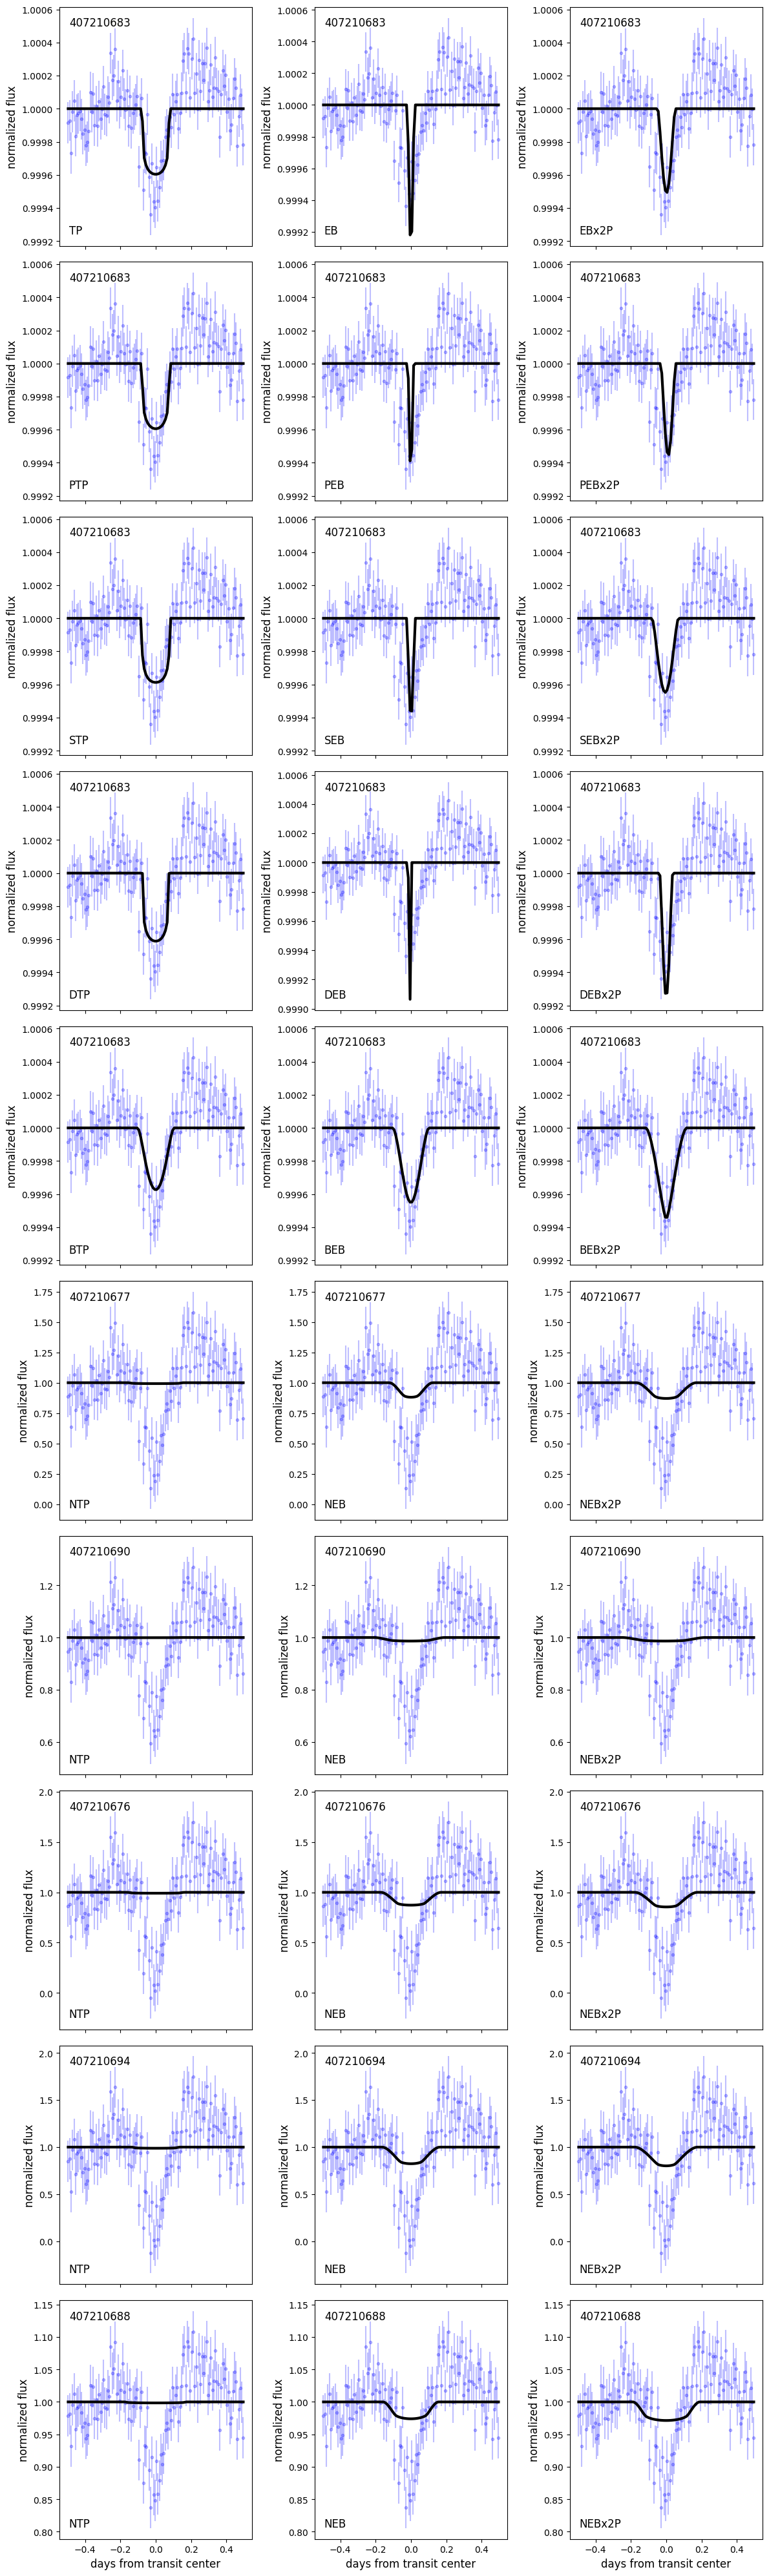

In [11]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [12]:
%%time
# Repetition reduced
FPPs = np.zeros(15)
NFPPs = np.zeros(15)
for i in range(15):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.2762584271485338 +/- 0.048798533707303395
NFPP = 1.328821044568703e-20 +/- 9.829452291513104e-22
CPU times: user 1h 27min 51s, sys: 1min 1s, total: 1h 28min 52s
Wall time: 57min 59s


Our final conclusion about this specified planet of TIC 407210683 is that it is most likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).